In [2]:
import pandas as pd
import numpy as np

data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium','high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent','fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes','no']
}

# Create a DataFrame
df = pd.DataFrame(data)
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [3]:
def entropy(data):
    counts = data.value_counts() / len(data)
    entropy = -np.sum(counts * np.log2(counts))
    return entropy

entropy_before_split = entropy(df['buys_computer'])

def information_gain(target, feature):
    total_entropy = entropy(target)
    values = feature.unique()
    weighted_entropy = 0
    for value in values:
        subset_indices = feature.index[feature == value]
        subset_target = target[subset_indices]
        weighted_entropy += (len(subset_target) / len(target)) * entropy(subset_target)
    return total_entropy - weighted_entropy

information_gains = {}
target = df['buys_computer']
for feature_name in df.columns[:-1]:  
    feature = df[feature_name]
    information_gains[feature_name] = information_gain(target, feature)

root_node = max(information_gains, key=information_gains.get)

print(f"Entropy (buys_computer): {entropy_before_split:.2f}")
print("Information Gains:")
for feature, ig in information_gains.items():
    print(f"{feature}: {ig:.2f}")

print(f"The first feature for the decision tree is: {root_node}")

Entropy (buys_computer): 0.94
Information Gains:
age: 0.25
income: 0.03
student: 0.15
credit_rating: 0.05
The first feature for the decision tree is: age


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=['buys_computer'])
y = df['buys_computer']

model = DecisionTreeClassifier()

model.fit(X, y)

training_accuracy = model.score(X, y)
print(f"Training Set Accuracy: {training_accuracy:.2f}")

tree_depth = model.get_depth()
print(f"Tree Depth: {tree_depth}")

Training Set Accuracy: 1.00
Tree Depth: 4


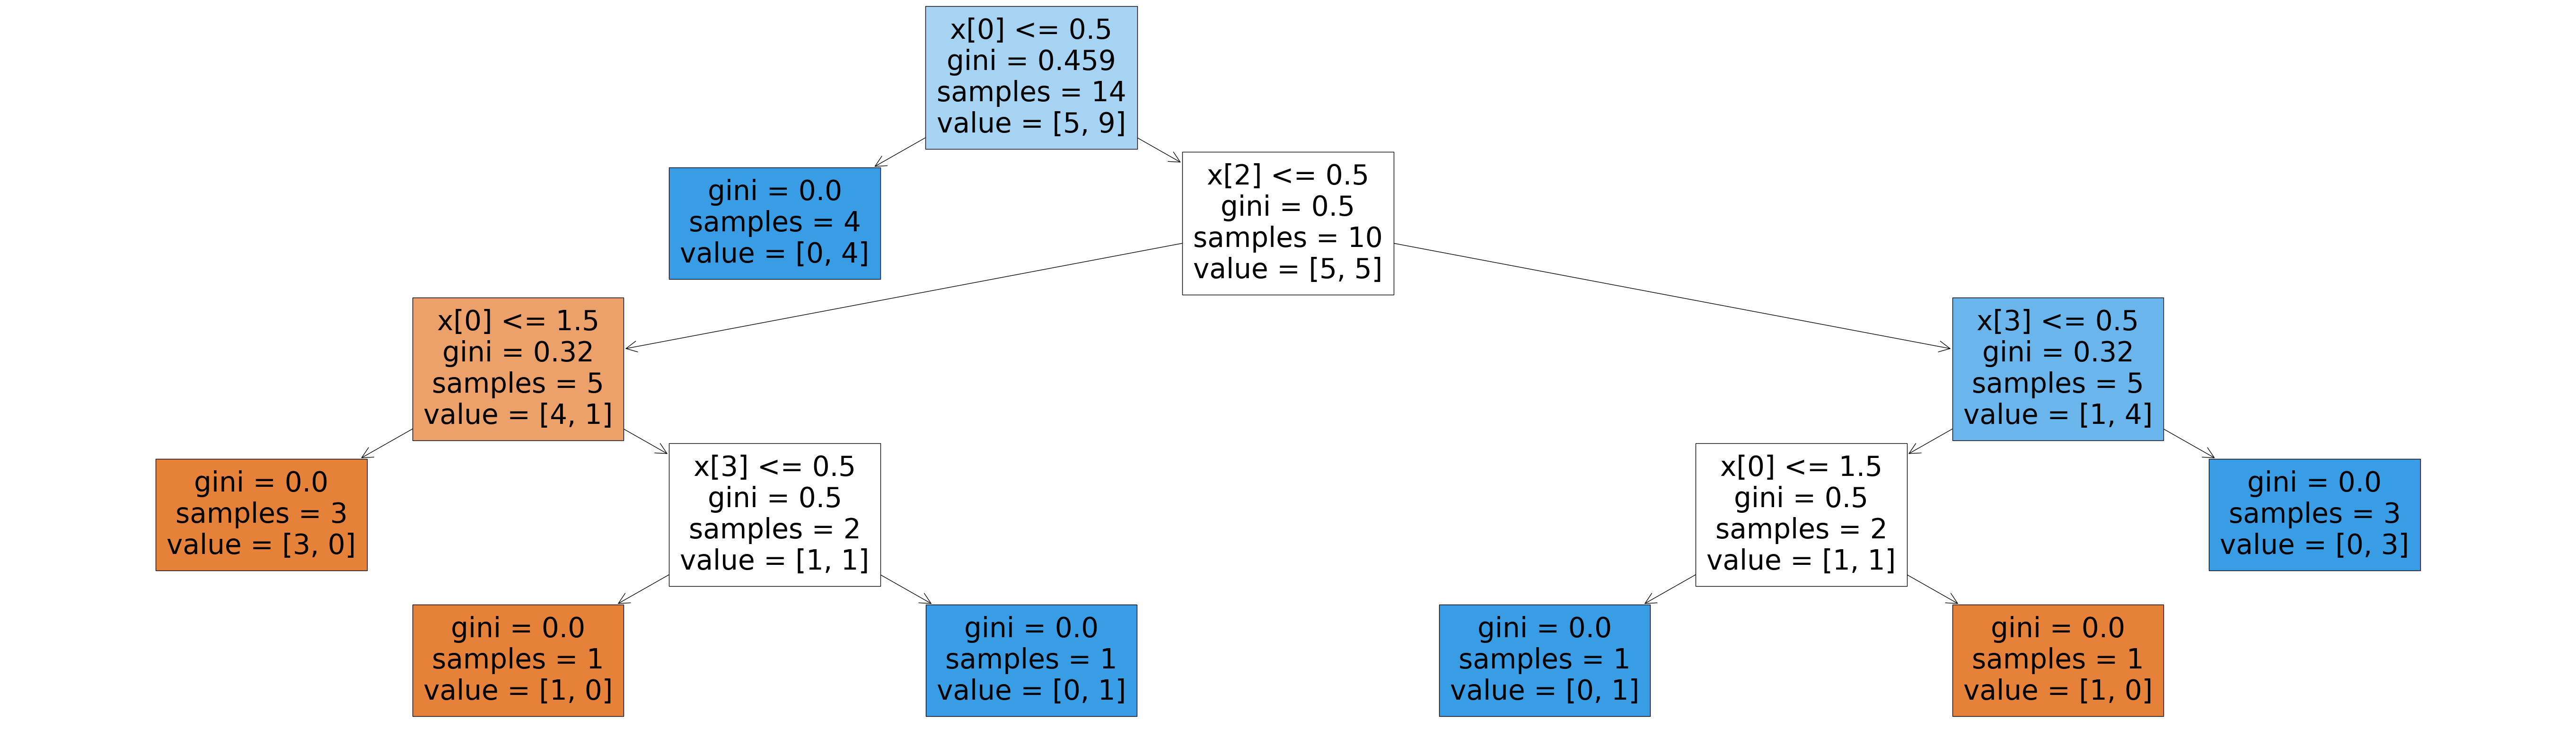

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(70, 20))
plot_tree(model, filled=True)
plt.show()

Training Set Accuracy: 1.00
Test Set Accuracy: 0.42


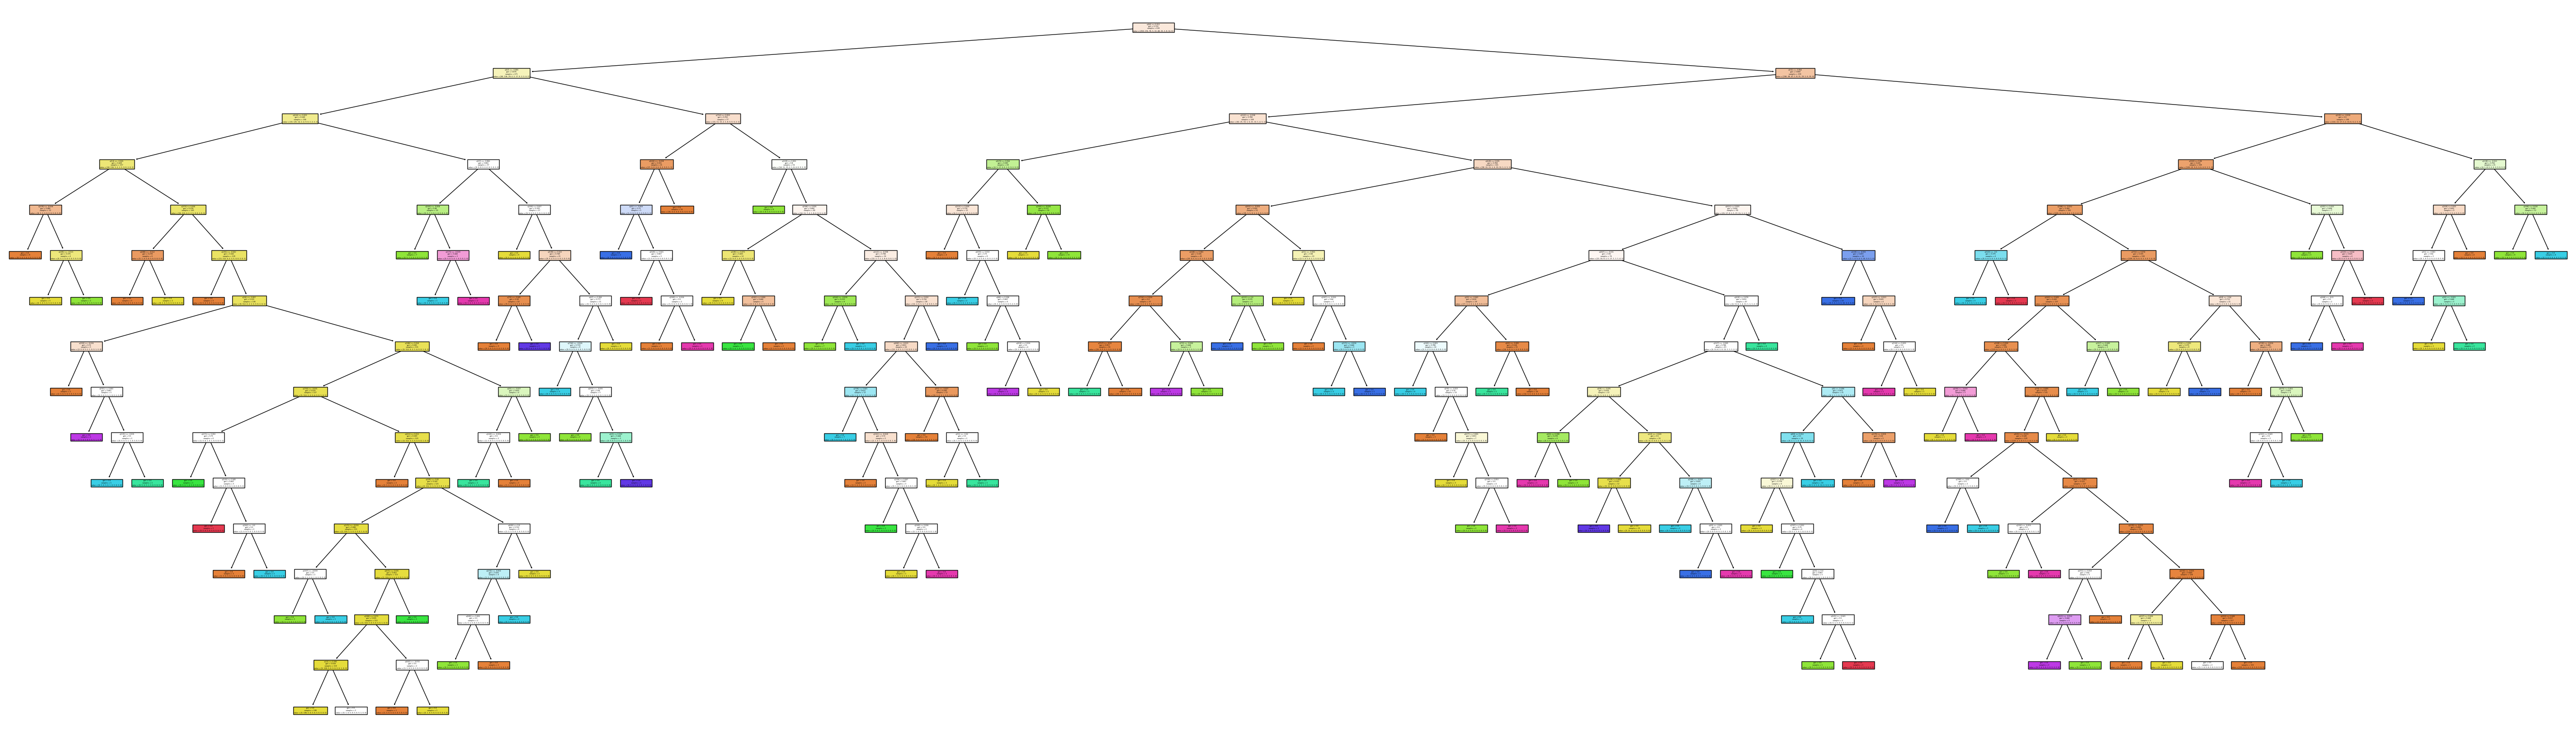

In [6]:
from sklearn.model_selection import train_test_split
data1 = pd.read_csv('final1.csv')
X = data1.iloc[:, :-1]
y = data1.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model1 = DecisionTreeClassifier()

model1.fit(X_train, y_train)

training_accuracy = model1.score(X_train, y_train)
print(f"Training Set Accuracy: {training_accuracy:.2f}")

test_accuracy = model1.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.2f}")

plt.figure(figsize=(70, 20))
plot_tree(model1, filled=True)
plt.show()

Training Set Accuracy (max_depth=5): 0.71
Test Set Accuracy (max_depth=5): 0.43


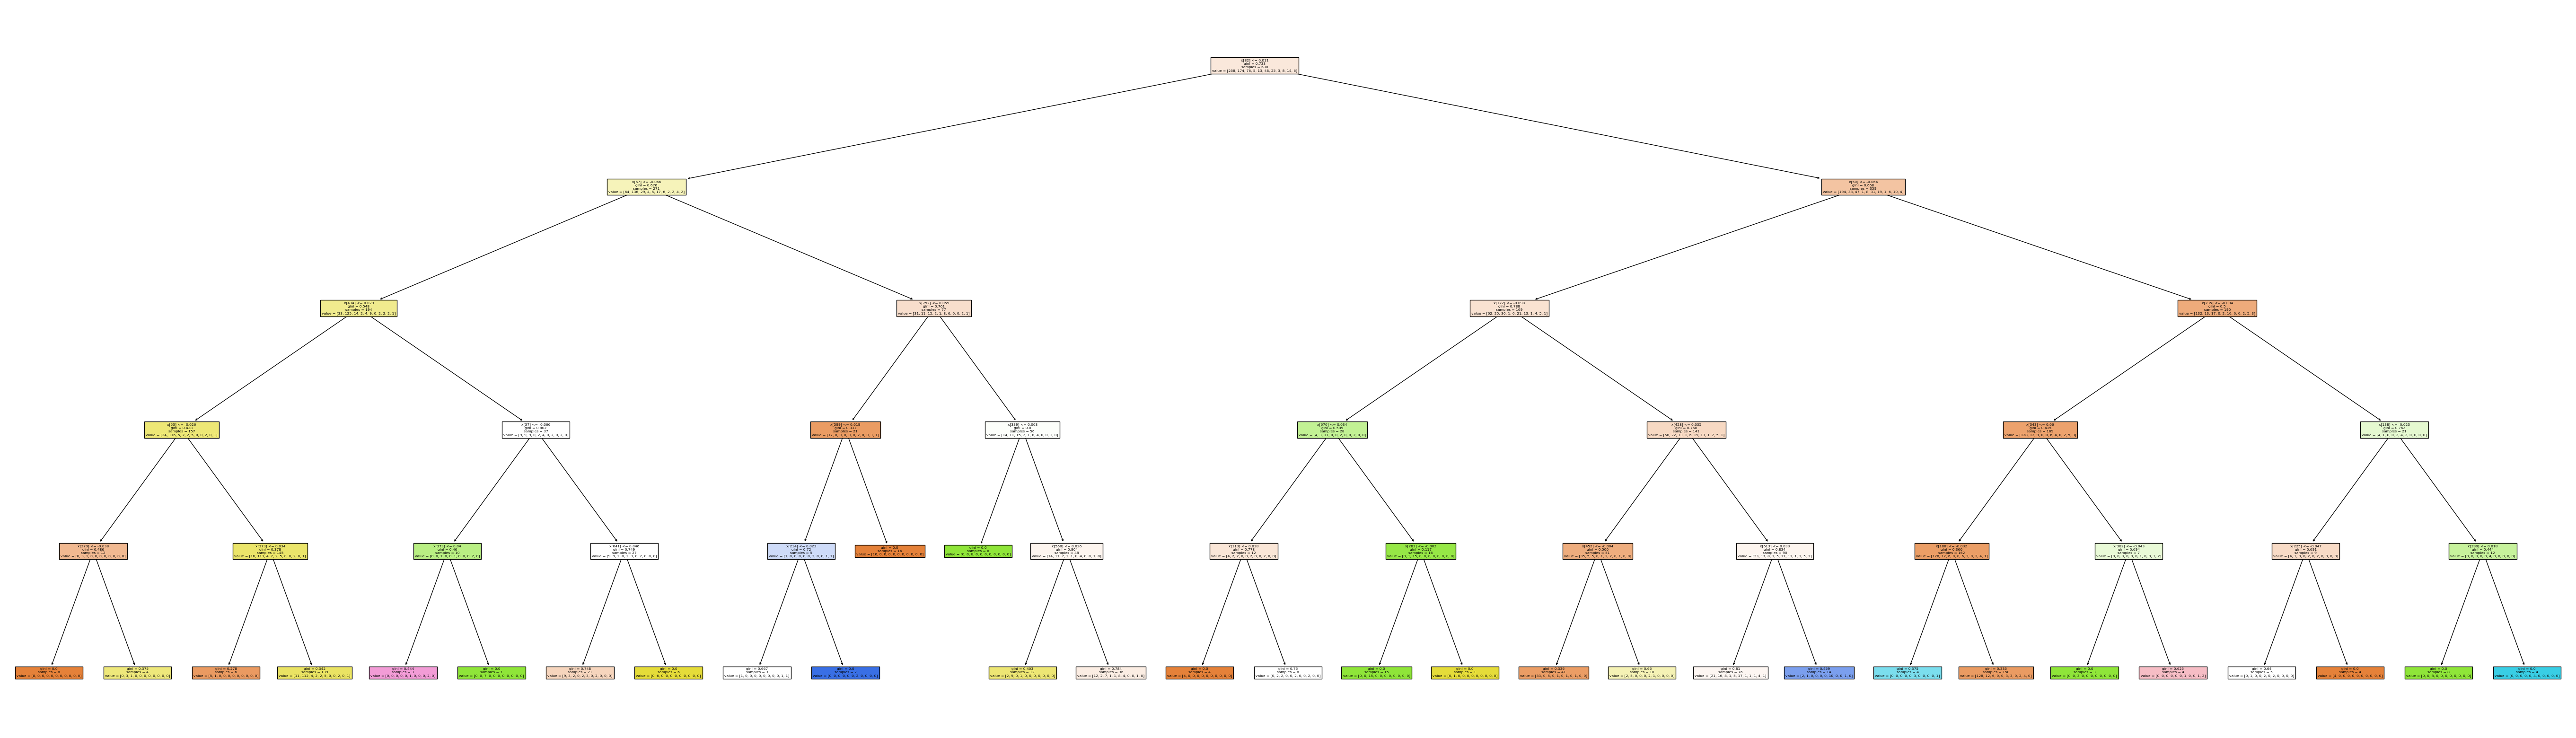

In [18]:
max_depth = 5  
model2 = DecisionTreeClassifier(max_depth=max_depth)
model2.fit(X_train, y_train)

training_accuracy = model2.score(X_train, y_train)
print(f"Training Set Accuracy (max_depth={max_depth}): {training_accuracy:.2f}")

test_accuracy = model2.score(X_test, y_test)
print(f"Test Set Accuracy (max_depth={max_depth}): {test_accuracy:.2f}")

plt.figure(figsize=(70, 20))
plot_tree(model2, filled=True)
plt.show()

Training Set Accuracy (Entropy Criterion): 1.00
Test Set Accuracy (Entropy Criterion): 0.40


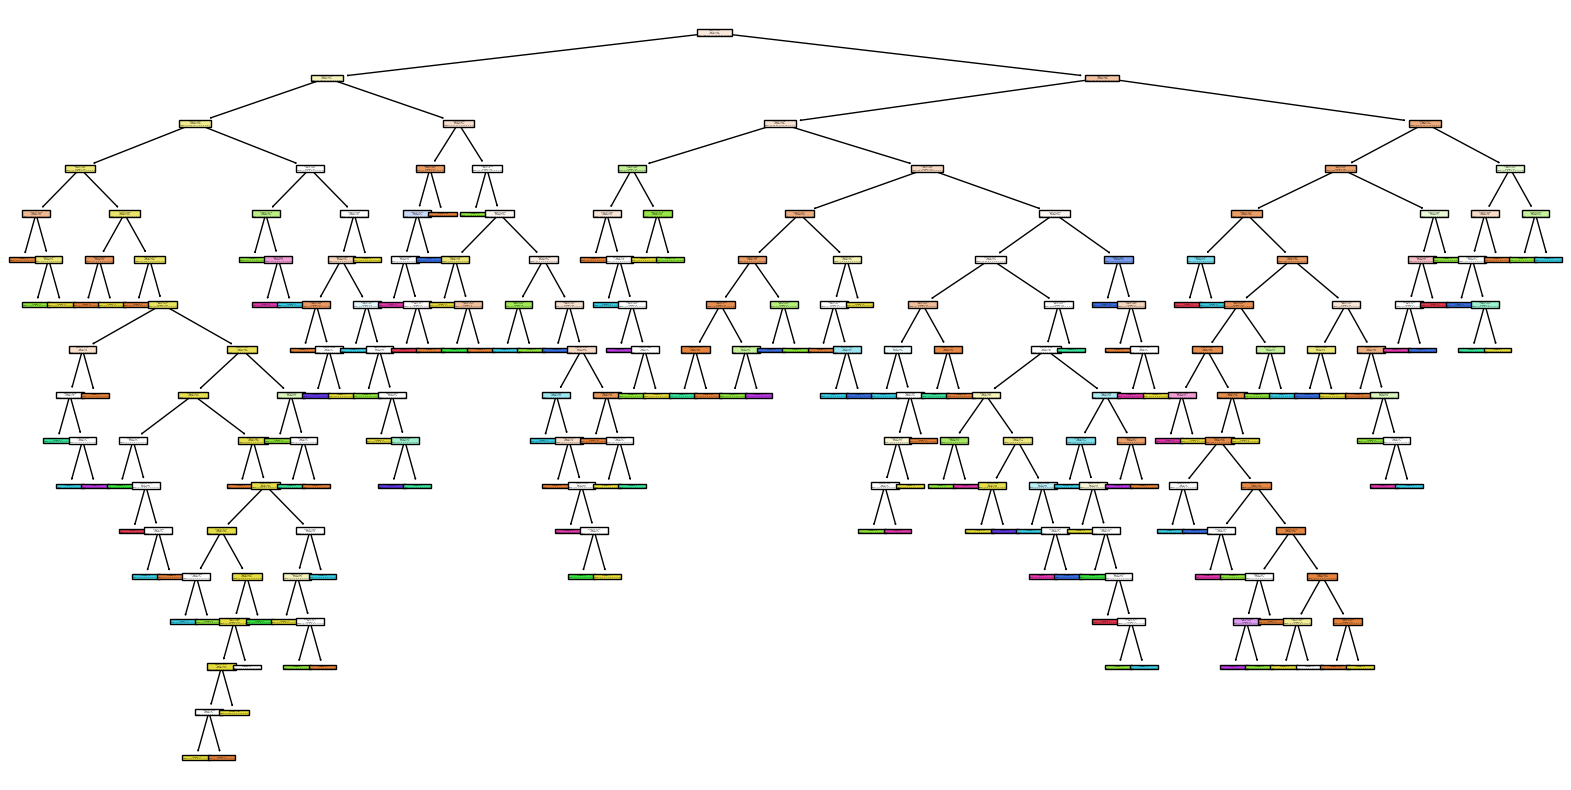

In [8]:
model2 = DecisionTreeClassifier(criterion="entropy")

model.fit(X_train, y_train)

training_accuracy = model.score(X_train, y_train)
print(f"Training Set Accuracy (Entropy Criterion): {training_accuracy:.2f}")

test_accuracy = model.score(X_test, y_test)
print(f"Test Set Accuracy (Entropy Criterion): {test_accuracy:.2f}")

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True)
plt.show()



In [11]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Create a Random Forest Classifier model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Make predictions with both models
decision_tree_predictions = model1.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

# Calculate performance metrics for Decision Tree
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_precision = precision_score(y_test, decision_tree_predictions, average='weighted')
decision_tree_recall = recall_score(y_test, decision_tree_predictions, average='weighted')
decision_tree_f1_score = f1_score(y_test, decision_tree_predictions, average='weighted')

# Calculate performance metrics for Random Forest
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions, average='weighted')
random_forest_recall = recall_score(y_test, random_forest_predictions, average='weighted')
random_forest_f1_score = f1_score(y_test, random_forest_predictions, average='weighted')

# Compare performance metrics
print("Decision Tree Performance Metrics:")
print(f"Accuracy: {decision_tree_accuracy:.2f}")
print(f"Precision: {decision_tree_precision:.2f}")
print(f"Recall: {decision_tree_recall:.2f}")
print(f"F1-Score: {decision_tree_f1_score:.2f}")

print("\nRandom Forest Performance Metrics:")
print(f"Accuracy: {random_forest_accuracy:.2f}")
print(f"Precision: {random_forest_precision:.2f}")
print(f"Recall: {random_forest_recall:.2f}")
print(f"F1-Score: {random_forest_f1_score:.2f}")


Decision Tree Performance Metrics:
Accuracy: 0.42
Precision: 0.43
Recall: 0.42
F1-Score: 0.42

Random Forest Performance Metrics:
Accuracy: 0.59
Precision: 0.59
Recall: 0.59
F1-Score: 0.50


C:\Users\jaswa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Model Parameters:
Number of Estimators (Trees): 100
Maximum Depth of Trees: None
Minimum Samples Required to Split: 2
Minimum Samples Required at Leaf: 1
Maximum Features Considered for Split: sqrt
Bootstrap Samples: True
Random State: None

Feature Ranking:
1. embed_82: 0.010292565894842893
2. embed_280: 0.006626766909437973
3. embed_56: 0.0064177237036613065
4. embed_728: 0.006240765911378112
5. embed_138: 0.006138552256528291
6. embed_129: 0.005889909265549248
7. embed_327: 0.005642594546634995
8. embed_122: 0.005211592862128639
9. embed_622: 0.005107574643635957
10. embed_697: 0.004912918683857536
11. embed_145: 0.0046516232610988376
12. embed_632: 0.004319081377212739
13. embed_260: 0.004300980370336929
14. embed_4: 0.004250070434499282
15. embed_354: 0.0041053630848864354
16. embed_338: 0.004060897676420538
17. embed_110: 0.003925316556159891
18. embed_85: 0.003778341474301074
19. embed_495: 0.003729302275317826
20. embed_529: 0.0037231673293450307
21. embed_669: 0.

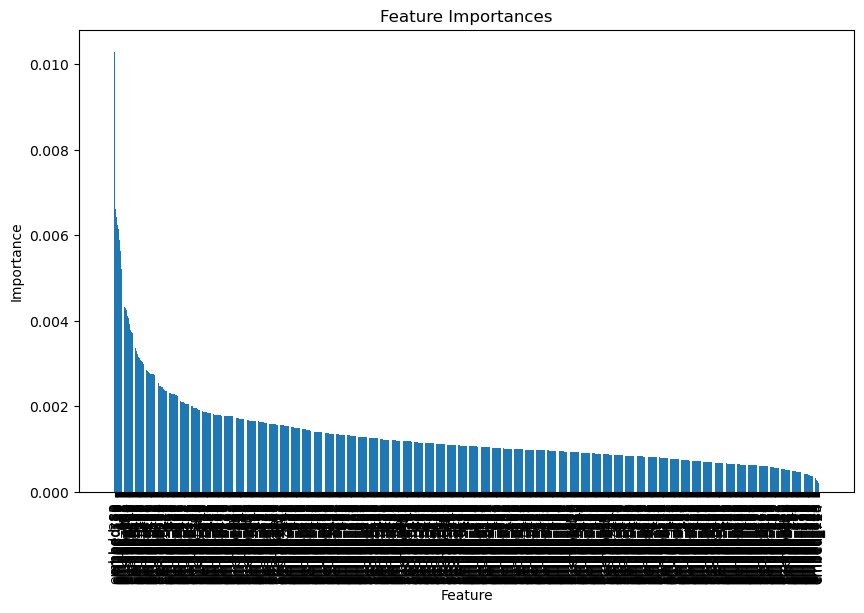

In [13]:


# Explore model parameters
print("Random Forest Model Parameters:")
print(f"Number of Estimators (Trees): {random_forest_model.n_estimators}")
print(f"Maximum Depth of Trees: {random_forest_model.max_depth}")
print(f"Minimum Samples Required to Split: {random_forest_model.min_samples_split}")
print(f"Minimum Samples Required at Leaf: {random_forest_model.min_samples_leaf}")
print(f"Maximum Features Considered for Split: {random_forest_model.max_features}")
print(f"Bootstrap Samples: {random_forest_model.bootstrap}")
print(f"Random State: {random_forest_model.random_state}")

# Analyze feature importances
feature_importances = random_forest_model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = feature_importances.argsort()[::-1]

# Print feature ranking
print("\nFeature Ranking:")
for i, idx in enumerate(sorted_idx):
    print(f"{i+1}. {feature_names[idx]}: {feature_importances[idx]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), [feature_names[idx] for idx in sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()
